# The Office Ratings

## About

This page showcases the work of [Cedric Sherer](https://www.cedricscherer.com), built for the [TidyTuesday](https://github.com/rfordatascience/tidytuesday) initiative. You can find the original code on his github repository [here](https://github.com/z3tt/TidyTuesday/blob/master/R/2021_22_MarioKart.Rmd). Thanks to him for accepting sharinig his work here! 🙏🙏

## Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.colors as mc
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from palettable import cartocolors

In [19]:
df_office = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-17/office_ratings.csv')

In [20]:
df_office.head()

,season,episode,title,imdb_rating,total_votes,air_date
0,1,1,Pilot,7.6,3706,2005-03-24
1,1,2,Diversity Day,8.3,3566,2005-03-29
2,1,3,Health Care,7.9,2983,2005-04-05
3,1,4,The Alliance,8.1,2886,2005-04-12
4,1,5,Basketball,8.4,3179,2005-04-19


In [28]:
df_office_avg = df_office.sort_values(["season", "episode"])
df_office_avg["episode_id"] = np.arange(len(df_office_avg)) + 1
df_office_avg["episode_mod"] =  df_office_avg["episode_id"] + (9 * df_office_avg["season"])
df_office_avg = df_office_avg.assign(
    avg = df_office_avg.groupby("season")["imdb_rating"].transform("mean"),
    mid = df_office_avg.groupby("season")["episode_mod"].transform("mean")
)

df_office_avg.head()

,season,episode,title,imdb_rating,total_votes,air_date,episode_id,episode_mod,avg,mid
0,1,1,Pilot,7.6,3706,2005-03-24,1,10,8.016667,12.5
1,1,2,Diversity Day,8.3,3566,2005-03-29,2,11,8.016667,12.5
2,1,3,Health Care,7.9,2983,2005-04-05,3,12,8.016667,12.5
3,1,4,The Alliance,8.1,2886,2005-04-12,4,13,8.016667,12.5
4,1,5,Basketball,8.4,3179,2005-04-19,5,14,8.016667,12.5


In [66]:
df_lines = df_office_avg.groupby("season").agg(
    start_x = ("episode_mod", min),
    end_x = ("episode_mod", max),
    y = ("avg", np.unique) # all values are the same, it would be the same to use min, max, or whatever
).reset_index()

df_lines["start_x"] -= 5
df_lines["end_x"] += 5

df_lines = pd.melt(
    df_lines, 
    id_vars=["season", "y"], 
    value_vars=["start_x", "end_x"], 
    var_name="type", 
    value_name="x"
)
df_lines["x_group"] = np.where(df_lines["type"] == "start_x", df_lines["x"] + 0.1, df_lines["x"] - 0.1)
df_lines["x_group"] = np.where(
    (df_lines["type"] == "start_x").values & (df_lines["x"] == np.min(df_lines["x"])).values, 
    df_lines["x_group"] - 0.1, 
    df_lines["x_group"]
)
df_lines["x_group"] = np.where(
    (df_lines["type"] == "end_x").values & (df_lines["x"] == np.max(df_lines["x"])).values, 
    df_lines["x_group"] + 0.1, 
    df_lines["x_group"]
)
df_lines = df_lines.sort_values(["season", "x_group"])
#df_lines

In [103]:
GREY82 = "#d1d1d1"
GREY40 = "#666666"

In [ ]:
cmap = mpl.cm.viridis
bounds = [-1, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

In [99]:
COLORS = ["#486090", "#D7BFA6", "#6078A8", "#9CCCCC", "#7890A8","#C7B0C1", "#B5C9C9", "#90A8C0", "#A8A890"]
colormap = mc.LinearSegmentedColormap.from_list("blue", COLORS)
normalize = mc.Normalize(vmin=1, vmax=9)

In [116]:
colormap(normalize(df_lines["season"]))

array([[0.28235294, 0.37647059, 0.56470588, 1.        ],
       [0.28235294, 0.37647059, 0.56470588, 1.        ],
       [0.84130719, 0.74792772, 0.65101115, 1.        ],
       [0.84130719, 0.74792772, 0.65101115, 1.        ],
       [0.37831603, 0.47317186, 0.6599308 , 1.        ],
       [0.37831603, 0.47317186, 0.6599308 , 1.        ],
       [0.61010381, 0.79723183, 0.7983391 , 1.        ],
       [0.61010381, 0.79723183, 0.7983391 , 1.        ],
       [0.4754479 , 0.56667436, 0.6603614 , 1.        ],
       [0.4754479 , 0.56667436, 0.6603614 , 1.        ],
       [0.77900807, 0.69211842, 0.75747789, 1.        ],
       [0.77900807, 0.69211842, 0.75747789, 1.        ],
       [0.70638985, 0.78519031, 0.78740484, 1.        ],
       [0.70638985, 0.78519031, 0.78740484, 1.        ],
       [0.5672895 , 0.65882353, 0.74777393, 1.        ],
       [0.5672895 , 0.65882353, 0.74777393, 1.        ],
       [0.65882353, 0.65882353, 0.56470588, 1.        ],
       [0.65882353, 0.65882353,

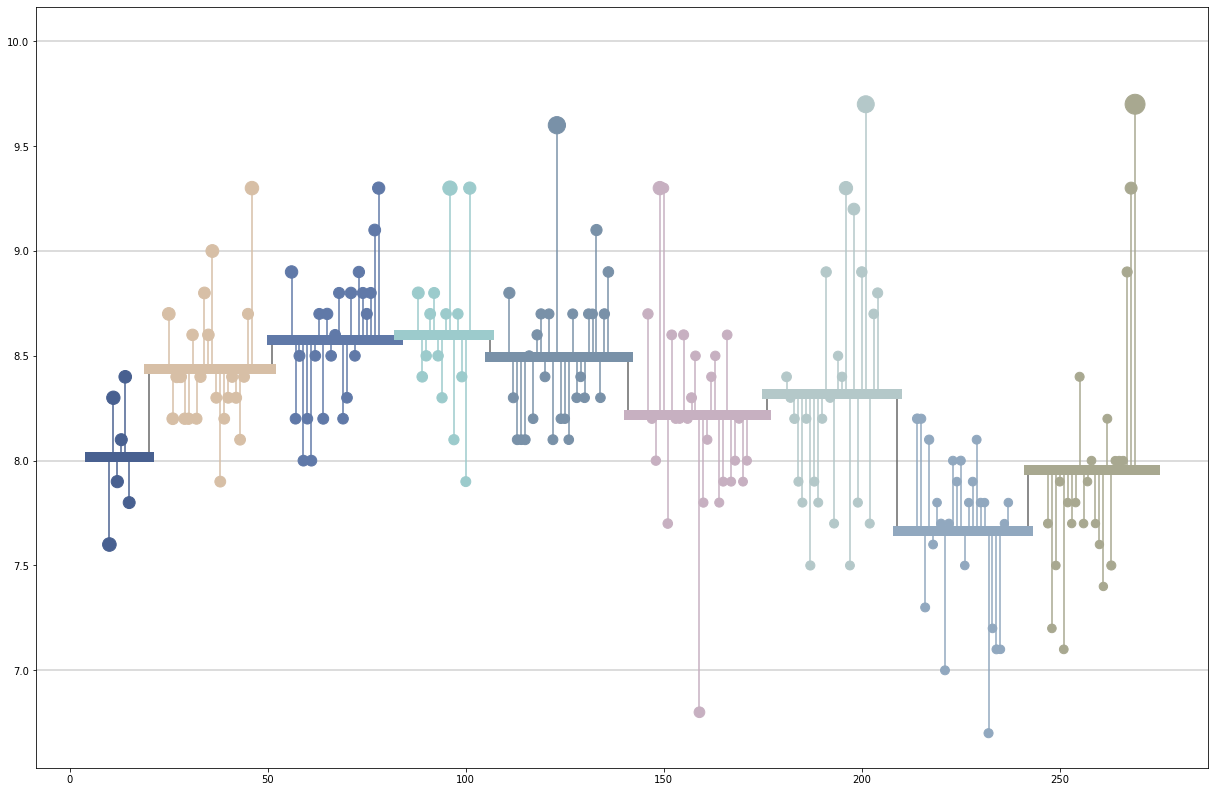

In [135]:
fig, ax = plt.subplots(figsize = (21, 14))

# First, horizontal lines that are used as scale reference
for h in [7, 8, 9, 10]:
    plt.axhline(h, color=GREY82, zorder=0)

plt.vlines(
    x="episode_mod", 
    ymin="imdb_rating", 
    ymax="avg",
    color=colormap(normalize(df_office_avg["season"])),
    data = df_office_avg
)

# Third is the format string, either empty or "-"
plt.plot("x", "y", "-", color=GREY40, data=df_lines)

for season in df_lines["season"].unique():
    d = df_lines[df_lines["season"] == season]
    plt.plot("x_group", "y", "", color=colormap(normalize(season)), lw=10, data=d)

    
plt.scatter(
    "episode_mod", 
    "imdb_rating",
    s = df_office_avg["total_votes"]/20,
    color=colormap(normalize(df_office_avg["season"])), 
    data=df_office_avg
);

In [5]:
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# matplotlib.font_manager.findfont("Roboto Mono")